## Libraries

In [1]:
import zipfile
import os 
import pandas as pd
import glob 
import matplotlib.pyplot as plt
import cv2
import json

import io
from PIL import Image 

## Downloading images

In [8]:
#Descompress train and test data
!curl -o /content/drive/MyDrive/hackaton/train_test_data.zip https://challenges-asset-files.s3.us-east-2.amazonaws.com/data_sets/Data-Science/4+-+events/SchneiderElectricEuropeanHackathon22/train_test_data.zip


  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100  309M  100  309M    0     0  22.5M      0  0:00:13  0:00:13 --:--:-- 26.3M


In [9]:
#Descompress train and test data
!curl -o /content/drive/MyDrive/hackaton/test.csv https://challenges-asset-files.s3.us-east-2.amazonaws.com/data_sets/Data-Science/4+-+events/SchneiderElectricEuropeanHackathon22/test.csv


  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100 46610  100 46610    0     0  89807      0 --:--:-- --:--:-- --:--:-- 89634


In [3]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [10]:
!curl -o /content/drive/MyDrive/hackaton/train.csv https://challenges-asset-files.s3.us-east-2.amazonaws.com/data_sets/Data-Science/4+-+events/SchneiderElectricEuropeanHackathon22/train.csv

  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100  127k  100  127k    0     0   176k      0 --:--:-- --:--:-- --:--:--  176k


## Exploring data

In [ ]:
path_data = '/content/drive/MyDrive/Hackaton2022/data/train_test_data/train_test_data' 
path_train_test = os.listdir(path_data)

num_train = len(os.listdir(os.path.join(path_data,path_train_test[1])))
num_test = len(os.listdir(os.path.join(path_data,path_train_test[0])))
train_path = os.path.join(path_data,path_train_test[1]) 
train_images = os.listdir(train_path)
test_path = os.path.join(path_data,path_train_test[0])
test_images = os.listdir(test_path)
total_data = num_train+num_test
print(f'Train images: {num_train} - {(num_train/total_data)*100}%')
print(f'Test images: {num_test} - {(num_test/total_data)*100}%')
print('Total images',total_data)

Train images: 1714 - 72.96722009365688%
Test images: 635 - 27.032779906343123%
Total images 2349


In [ ]:
validation  = num_train * 0.3

### Exploring images

Image 0 with a size of (332, 332, 3)
Image 1 with a size of (332, 332, 3)
Image 2 with a size of (332, 332, 3)
Image 3 with a size of (332, 332, 3)
Image 4 with a size of (332, 332, 3)
Image 5 with a size of (332, 332, 3)
Image 6 with a size of (332, 332, 3)
Image 7 with a size of (332, 332, 3)
Image 8 with a size of (332, 332, 3)


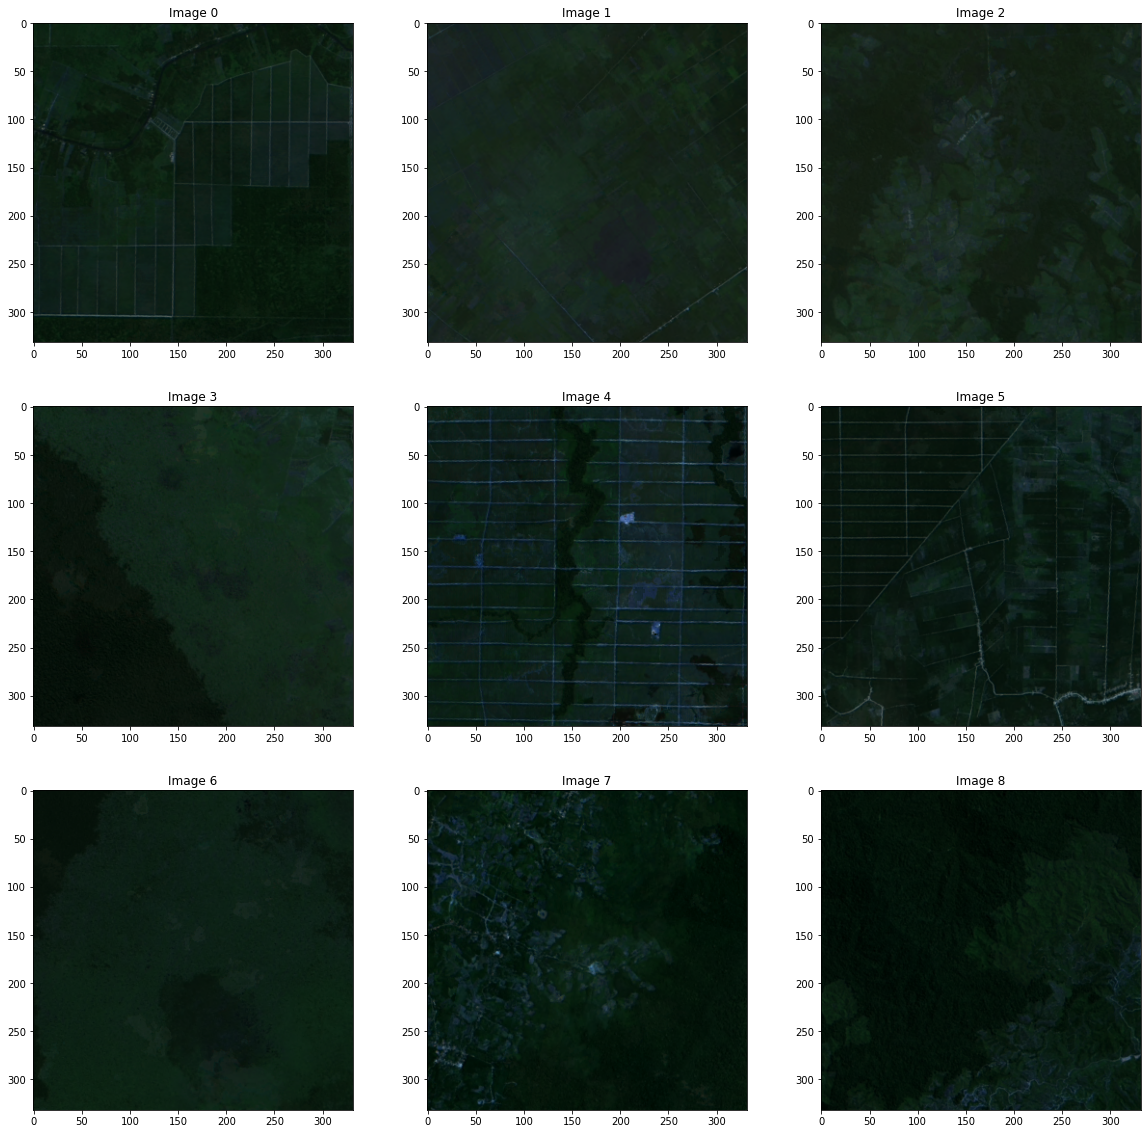

In [ ]:
plt.figure(figsize=(20, 20))
for i in range(9):
  img = cv2.imread(os.path.join(train_path,train_images[i]))
  ax = plt.subplot(3, 3, i + 1)
  plt.imshow(img)
  plt.title(f'Image {i}')
  #plt.axis("off")
  print(f'Image {i} with a size of {img.shape}')

### Checking image size

In [ ]:
len(train_images)

635

In [ ]:
for i in range(num_train):
  rooth = os.path.join(train_path,train_images[i])
  
  img = cv2.imread(rooth)
  if img.shape != (332, 332, 3):
    print(f'Image {i} with a size of {img.shape}')    
print('All the images have the same size for training')

for i in range(num_test):
  img = cv2.imread(os.path.join(test_path,test_images[i]))
  if img.shape != (332, 332, 3):
    print(f'Image {i} with a size of {img.shape}')
print('All the images have the same size for testing')

All the images have the same size for training
All the images have the same size for testing


# Exploring metadata

In [ ]:
path_meta_train = '/content/drive/MyDrive/Hackaton2022/data/train.csv'
path_meta_test = '/content/drive/MyDrive/Hackaton2022/data/test.csv'

df_train = pd.read_csv(path_meta_train)
df_test = pd.read_csv(path_meta_test)

In [ ]:
df_train.head()

,label,latitude,longitude,year,example_path
0,0,-2.051853,111.826093,2001,train_test_data/train/1297.png
1,2,-1.989349,105.309496,2013,train_test_data/train/1199.png
2,0,1.223256,100.702217,2014,train_test_data/train/1348.png
3,0,-2.342948,103.890226,2008,train_test_data/train/2214.png
4,0,-0.126555,101.758175,2011,train_test_data/train/2220.png


## Extract labels 1 and create new images with data augmentation

In [ ]:
label_1 = df_train[df_train.label == 1]
ss = pd.DataFrame(label_1)
ss.reset_indrop=True
print(len(ss))
print(ss)

from keras.preprocessing. image import ImageDataGenerator

# define data preparation
datagen = ImageDataGenerator (rotation_range=90)

196
      label  latitude   longitude  year                    example_path
6         1 -0.837216  102.906139  2016  train_test_data/train/1355.png
11        1 -2.643105  121.702178  2016  train_test_data/train/1286.png
22        1  2.960455   97.479727  2012   train_test_data/train/377.png
42        1 -1.023483  115.271862  2014  train_test_data/train/1903.png
46        1 -1.925667  114.017105  2016   train_test_data/train/573.png
...     ...       ...         ...   ...                             ...
1659      1 -6.500508  138.704721  2015  train_test_data/train/1627.png
1663      1 -2.950291  133.193605  2015  train_test_data/train/2222.png
1678      1 -2.251886  114.664116  2016  train_test_data/train/1750.png
1705      1 -0.978231  110.183019  2015   train_test_data/train/352.png
1711      1  0.443397  112.200163  2012  train_test_data/train/1486.png

[196 rows x 5 columns]


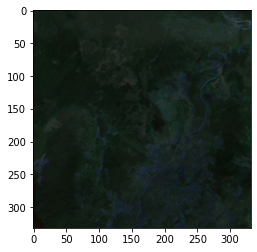

In [ ]:
# example of horizontal flip image augmentation
from numpy import expand_dims
imgo = label_1['example_path'][11]
imgo = cv2.imread(imgo)

plt.imshow(imgo)
plt.show()


samples = expand_dims(imgo, 0)
# create image data augmentation generator
#datagen = ImageDataGenerator(horizontal_flip=True)
# prepare iterator
it = datagen.flow(samples, batch_size=1)



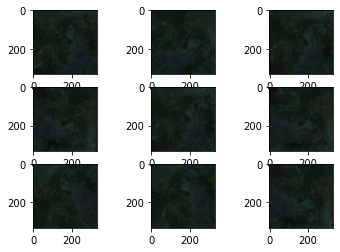

In [ ]:
import matplotlib.pyplot as plt
store = '/content/augmentation/'
# generate samples and plot
for i in range(9):
	# define subplot
	plt.subplot(330 + 1 + i)
	# generate batch of images
	batch = it.next()
	# convert to unsigned integers for viewing
	image = batch[0].astype('uint8')
	# plot raw pixel data
	plt.imshow(image)
# show the figure
plt.show()


In [ ]:
df_test.head()

,latitude,longitude,year,example_path
0,0.761681,122.755954,2006,train_test_data/test/69.png
1,-8.059785,113.053791,2007,train_test_data/test/469.png
2,-2.006610,111.746316,2002,train_test_data/test/6.png
3,0.901765,114.042495,2016,train_test_data/test/351.png
4,1.911210,100.829633,2008,train_test_data/test/1001.png


In [ ]:
print(df_train['label'].unique())

[0 2 1]


# Pre processing data

In [11]:
# data
!cp /content/drive/MyDrive/hackaton/train_test_data.zip .
!unzip -qq train_test_data.zip 
!rm train_test_data.zip
# train metadata
!cp /content/drive/MyDrive/hackaton/train.csv .
# test metadata
!cp /content/drive/MyDrive/hackaton/test.csv .

### Dataloader

In [12]:
import matplotlib.pyplot as plt
import numpy as np
import tensorflow as tf
import tensorflow_datasets as tfds
from tensorflow.keras import layers

In [13]:
train_path = '/content/train.csv'
train = pd.read_csv(train_path)
test_path = '/content/test.csv'
test = pd.read_csv(test_path)

In [14]:
train.head(5)


,label,latitude,longitude,year,example_path
0,0,-2.051853,111.826093,2001,train_test_data/train/1297.png
1,2,-1.989349,105.309496,2013,train_test_data/train/1199.png
2,0,1.223256,100.702217,2014,train_test_data/train/1348.png
3,0,-2.342948,103.890226,2008,train_test_data/train/2214.png
4,0,-0.126555,101.758175,2011,train_test_data/train/2220.png


In [15]:
test.head(5)

,latitude,longitude,year,example_path
0,0.761681,122.755954,2006,train_test_data/test/69.png
1,-8.059785,113.053791,2007,train_test_data/test/469.png
2,-2.006610,111.746316,2002,train_test_data/test/6.png
3,0.901765,114.042495,2016,train_test_data/test/351.png
4,1.911210,100.829633,2008,train_test_data/test/1001.png


In [16]:
from sklearn.model_selection import train_test_split

In [17]:
x_train = list(train['example_path'])
y_train = list(train['label'])

print(x_train)

['train_test_data/train/1297.png', 'train_test_data/train/1199.png', 'train_test_data/train/1348.png', 'train_test_data/train/2214.png', 'train_test_data/train/2220.png', 'train_test_data/train/731.png', 'train_test_data/train/1355.png', 'train_test_data/train/322.png', 'train_test_data/train/2194.png', 'train_test_data/train/1418.png', 'train_test_data/train/1808.png', 'train_test_data/train/1286.png', 'train_test_data/train/639.png', 'train_test_data/train/2262.png', 'train_test_data/train/2280.png', 'train_test_data/train/956.png', 'train_test_data/train/1384.png', 'train_test_data/train/1054.png', 'train_test_data/train/881.png', 'train_test_data/train/1109.png', 'train_test_data/train/1311.png', 'train_test_data/train/1957.png', 'train_test_data/train/377.png', 'train_test_data/train/468.png', 'train_test_data/train/1945.png', 'train_test_data/train/227.png', 'train_test_data/train/348.png', 'train_test_data/train/94.png', 'train_test_data/train/422.png', 'train_test_data/train/78

In [18]:
x_test = test['example_path']
print(x_test)

0        train_test_data/test/69.png
1       train_test_data/test/469.png
2         train_test_data/test/6.png
3       train_test_data/test/351.png
4      train_test_data/test/1001.png
                   ...              
630     train_test_data/test/968.png
631      train_test_data/test/54.png
632     train_test_data/test/494.png
633     train_test_data/test/287.png
634     train_test_data/test/603.png
Name: example_path, Length: 635, dtype: object


In [19]:

def create_dataset_PIL(cur_dir): 
    
    dataset=[]
    SIZE = 336
    class_name=[]
    
    for dir1 in os.listdir(cur_dir):
        file = os.path.join(cur_dir, dir1)

        image = cv2.imread(file)
        image = Image.fromarray(image, 'RGB')
        image = image.resize((SIZE,SIZE))
        dataset.append(np.array(image))

    return dataset 
# This dataset is to test the model
dataset = create_dataset_PIL('/content/train_test_data/test')

In [20]:
X_train, X_val, Y_train, Y_val = train_test_split(x_train, y_train, test_size=0.3, random_state=1234)

print(len(X_train))
print(len(X_val))

1199
515


In [21]:
example_img = x_train[34]
img2 = cv2.imread(example_img)
print(type(img2))

<class 'numpy.ndarray'>


In [22]:
import random
from matplotlib.rcsetup import validate_sketch
import keras

# Our customize dataloader
class DataGenerator(keras.utils.Sequence):

  def __init__(self, x_names, y_names, batch_size):
    
    self.x_values = x_names.copy()
    self.y_values =   y_names.copy()
    self.num_imgs = len(x_names)
    self.batch_size = batch_size

  def __getitem__(self, index):

    # position of the batch in the sequence

    aux_index = index * self.batch_size

    x = [] # numpy array with shape (batch_size, input_height, input_width, input_channel)
    y = [] # numpy array with shape (batch_size, num_classes)
    

    for _ in range(self.batch_size):

      img_name = self.x_values[aux_index]
      #print(img_name)
      img = cv2.imread(img_name)
      x.append(img)
      #print(type(img))
      y.append(self.y_values[aux_index])
      aux_index += 1

    x = np.array(x)
    y = np.array(y)
    #Normalize data
    #x = (x - x.mean) / x.std #Method 1

    x = x/255 # Method 2
    return x, y

  def on_epoch_end(self):
    num = random.randint(0,1000)
    random.Random(num).shuffle(self.x_values)
    random.Random(num).shuffle(self.y_values)

  def __len__ (self):
    # return the number of batches the generator can produce
    return (self.num_imgs) // self.batch_size


In [23]:
## Transforming labels to correct format

from tensorflow.keras.utils import to_categorical
train_labels = to_categorical(Y_train, num_classes=3)
test_labels = to_categorical(Y_val, num_classes=3)


In [24]:
# Generate dataloaders
training_dataloader =  DataGenerator(X_train,train_labels,16)
validation_dataloader =  DataGenerator(X_val,train_labels,16)

input_shape = (336, 336, 3)

In [ ]:
# Validating the class
training_dataloader.__getitem__(0)

(array([[[[0.05098039, 0.10588235, 0.0627451 ],
          [0.05490196, 0.10980392, 0.06666667],
          [0.05490196, 0.10980392, 0.06666667],
          ...,
          [0.09019608, 0.18039216, 0.10196078],
          [0.08627451, 0.18431373, 0.10588235],
          [0.08627451, 0.18039216, 0.10196078]],
 
         [[0.04705882, 0.10196078, 0.05882353],
          [0.05098039, 0.10196078, 0.0627451 ],
          [0.05098039, 0.10588235, 0.0627451 ],
          ...,
          [0.08627451, 0.17254902, 0.10588235],
          [0.08235294, 0.17647059, 0.10588235],
          [0.08235294, 0.17647059, 0.10196078]],
 
         [[0.05098039, 0.10588235, 0.0627451 ],
          [0.04705882, 0.09803922, 0.05882353],
          [0.04313725, 0.10196078, 0.05490196],
          ...,
          [0.08627451, 0.17254902, 0.10980392],
          [0.08627451, 0.17647059, 0.10980392],
          [0.08235294, 0.17647059, 0.10588235]],
 
         ...,
 
         [[0.1254902 , 0.16862745, 0.12156863],
          [0.13725

### VGG16 model

#### Model 1

1.   Categorical Crossentropy
2.   Adam optimizer
3. 



In [25]:

from tensorflow.keras.applications.vgg16 import VGG16
from tensorflow.keras.applications.vgg16 import preprocess_input
from tensorflow.keras import layers, models
from tensorflow.keras.callbacks import EarlyStopping


## Loading VGG16 model
base_model = VGG16(weights="imagenet", include_top=False, input_shape=input_shape)
base_model.trainable = False ## Not trainable weights



flatten_layer = layers.Flatten()
dense_layer_1 = layers.Dense(50, activation='relu')
dense_layer_2 = layers.Dense(20, activation='relu')
prediction_layer = layers.Dense(3, activation='softmax')


model = models.Sequential([
    base_model,
    flatten_layer,
    dense_layer_1,
    dense_layer_2,
    prediction_layer
])
model.summary()

58889256/58889256 [==============================] - 2s 0us/step
Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 vgg16 (Functional)          (None, 10, 10, 512)       14714688  
                                                                 
 flatten (Flatten)           (None, 51200)             0         
                                                                 
 dense (Dense)               (None, 50)                2560050   
                                                                 
 dense_1 (Dense)             (None, 20)                1020      
                                                                 
 dense_2 (Dense)             (None, 3)                 63        
                                                                 
Total params: 17,275,821
Trainable params: 2,561,133
Non-trainable params: 14,714,688
_____________________________________

### Compile

In [26]:
from keras import backend as K

def recall_m(y_true, y_pred):
    true_positives = K.sum(K.round(K.clip(y_true * y_pred, 0, 1)))
    possible_positives = K.sum(K.round(K.clip(y_true, 0, 1)))
    recall = true_positives / (possible_positives + K.epsilon())
    return recall

def precision_m(y_true, y_pred):
    true_positives = K.sum(K.round(K.clip(y_true * y_pred, 0, 1)))
    predicted_positives = K.sum(K.round(K.clip(y_pred, 0, 1)))
    precision = true_positives / (predicted_positives + K.epsilon())
    return precision

def f1_m(y_true, y_pred):
    precision = precision_m(y_true, y_pred)
    recall = recall_m(y_true, y_pred)
    return 2*((precision*recall)/(precision+recall+K.epsilon()))


def f1_score(y_true, y_logit):
    '''
    Calculate F1 score
    y_true: true value
    y_logit: predicted value
    '''
    true_positives = K.sum(K.round(K.clip(y_true * y_logit, 0, 1)))
    possible_positives = K.sum(K.round(K.clip(y_true, 0, 1)))
    recall = true_positives / (possible_positives + K.epsilon())
    predicted_positives = K.sum(K.round(K.clip(y_logit, 0, 1)))
    precision = true_positives / (predicted_positives + K.epsilon())
    return (2 * precision * recall) / (precision + recall + K.epsilon())

def transform_predictions(Y_predictions):
  predict = [ ]
  for i in range(len(Y_predictions)):
    predict.append(np.argmax(Y_predictions[i]))
  df = pd.DataFrame(predict, columns=['Prediction'])
  return df.T

# Compile wit all the metrics
#model.compile(optimizer='adam',
#              loss=tf.keras.losses.SparseCategoricalCrossentropy(),
#              metrics=['accuracy',f1_m,precision_m, recall_m, f1_score])
# Compile with f1 score

In [27]:
model.compile(optimizer='adam',
              loss=tf.keras.losses.CategoricalCrossentropy(),
              metrics=[f1_score])

### *Training* 8

In [ ]:
history_8 = model.fit_generator(generator=training_dataloader,epochs=10, 
                    validation_data=validation_dataloader)

Epoch 1/10


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  


149/149 [==============================] - 30s 182ms/step - loss: 1.0164 - f1_score: 0.5812 - val_loss: 1.4979 - val_f1_score: 0.3801
Epoch 2/10
149/149 [==============================] - 27s 181ms/step - loss: 1.0310 - f1_score: 0.4721 - val_loss: 1.1301 - val_f1_score: 0.3752
Epoch 3/10
149/149 [==============================] - 28s 189ms/step - loss: 1.0753 - f1_score: 0.2779 - val_loss: 1.0269 - val_f1_score: 0.0035
Epoch 4/10
149/149 [==============================] - 28s 190ms/step - loss: 1.0151 - f1_score: 0.3156 - val_loss: 1.0446 - val_f1_score: 0.2321
Epoch 5/10
149/149 [==============================] - 29s 195ms/step - loss: 0.9448 - f1_score: 0.5815 - val_loss: 0.9871 - val_f1_score: 0.5879
Epoch 6/10
149/149 [==============================] - 30s 201ms/step - loss: 0.7503 - f1_score: 0.7424 - val_loss: 0.8787 - val_f1_score: 0.6855
Epoch 7/10
149/149 [==============================] - 29s 197ms/step - loss: 0.5766 - f1_score: 0.8356 - val_loss: 0.6552 - val_f1_score: 0.8

### Trainning batchsize 16

In [ ]:
history_batchsize16 = model.fit_generator(generator=training_dataloader,epochs=10, 
                    validation_data=validation_dataloader)

Epoch 1/10


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  


74/74 [==============================] - 22s 282ms/step - loss: 0.9091 - f1_score: 0.5762 - val_loss: 1.2112 - val_f1_score: 0.3609
Epoch 2/10
74/74 [==============================] - 26s 358ms/step - loss: 0.9831 - f1_score: 0.4968 - val_loss: 1.0500 - val_f1_score: 0.3458
Epoch 3/10
74/74 [==============================] - 22s 294ms/step - loss: 1.0004 - f1_score: 0.3745 - val_loss: 1.0449 - val_f1_score: 0.3755
Epoch 4/10
74/74 [==============================] - 22s 295ms/step - loss: 1.0117 - f1_score: 0.3123 - val_loss: 1.0708 - val_f1_score: 0.2177
Epoch 5/10
74/74 [==============================] - 21s 284ms/step - loss: 0.9321 - f1_score: 0.5121 - val_loss: 0.9645 - val_f1_score: 0.5918
Epoch 6/10
74/74 [==============================] - 23s 306ms/step - loss: 0.7969 - f1_score: 0.6800 - val_loss: 0.8775 - val_f1_score: 0.6836
Epoch 7/10
74/74 [==============================] - 25s 341ms/step - loss: 0.6599 - f1_score: 0.7660 - val_loss: 0.6865 - val_f1_score: 0.8184
Epoch 8/10

In [ ]:
# Predictions
X = np.array(dataset)

In [ ]:
X[:1].shape

(1, 336, 336, 3)

In [ ]:
Y_predictions = model.predict(X)

20/20 [==============================] - 7s 349ms/step


In [ ]:
prediction_to_deliver = transform_predictions(Y_predictions)  

In [ ]:
prediction_to_deliver.head(15)
prediction_to_deliver.to_json('results_hackaton.json')

### Second try 16 batches

In [28]:
history_batchsize16_2 = model.fit_generator(generator=training_dataloader,epochs=10, 
                    validation_data=validation_dataloader)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  


Epoch 1/10
74/74 [==============================] - 28s 245ms/step - loss: 0.9913 - f1_score: 0.5252 - val_loss: 1.2258 - val_f1_score: 0.3826
Epoch 2/10
74/74 [==============================] - 20s 272ms/step - loss: 0.9736 - f1_score: 0.4897 - val_loss: 1.1000 - val_f1_score: 0.3661
Epoch 3/10
74/74 [==============================] - 18s 247ms/step - loss: 1.0488 - f1_score: 0.3789 - val_loss: 1.0774 - val_f1_score: 0.3875
Epoch 4/10
74/74 [==============================] - 23s 316ms/step - loss: 1.0252 - f1_score: 0.4025 - val_loss: 1.0611 - val_f1_score: 0.4452
Epoch 5/10
74/74 [==============================] - 24s 323ms/step - loss: 0.9938 - f1_score: 0.4492 - val_loss: 1.0447 - val_f1_score: 0.6152
Epoch 6/10
74/74 [==============================] - 20s 265ms/step - loss: 0.8966 - f1_score: 0.5820 - val_loss: 0.8406 - val_f1_score: 0.6477
Epoch 7/10
74/74 [==============================] - 20s 267ms/step - loss: 0.7861 - f1_score: 0.7267 - val_loss: 0.7273 - val_f1_score: 0.7763

In [30]:
# Predictions
X = np.array(dataset)
Y_predictions = model.predict(X)
prediction_to_deliver = transform_predictions(Y_predictions)  
prediction_to_deliver.to_json('/content/drive/MyDrive/hackaton/results_hackaton.json')

20/20 [==============================] - 7s 369ms/step


In [31]:
prediction_to_deliver.to_json(orient="index")  
with open("predictions.json", "w") as outfile:
    outfile.write(json_object)

'{"Prediction":{"0":2,"1":0,"2":2,"3":2,"4":0,"5":2,"6":0,"7":2,"8":0,"9":2,"10":0,"11":2,"12":2,"13":2,"14":2,"15":2,"16":2,"17":2,"18":2,"19":0,"20":2,"21":0,"22":2,"23":2,"24":2,"25":0,"26":2,"27":2,"28":2,"29":2,"30":2,"31":0,"32":2,"33":2,"34":0,"35":0,"36":0,"37":2,"38":2,"39":0,"40":2,"41":2,"42":0,"43":2,"44":2,"45":0,"46":0,"47":2,"48":0,"49":0,"50":2,"51":0,"52":2,"53":0,"54":0,"55":2,"56":0,"57":0,"58":0,"59":0,"60":2,"61":0,"62":2,"63":2,"64":2,"65":0,"66":2,"67":2,"68":0,"69":2,"70":0,"71":2,"72":2,"73":2,"74":0,"75":2,"76":2,"77":2,"78":2,"79":2,"80":2,"81":2,"82":2,"83":2,"84":0,"85":2,"86":2,"87":0,"88":2,"89":0,"90":2,"91":2,"92":2,"93":2,"94":2,"95":2,"96":0,"97":2,"98":2,"99":2,"100":2,"101":2,"102":0,"103":0,"104":2,"105":0,"106":0,"107":2,"108":2,"109":2,"110":2,"111":2,"112":2,"113":0,"114":2,"115":2,"116":0,"117":2,"118":2,"119":2,"120":2,"121":2,"122":2,"123":0,"124":2,"125":2,"126":0,"127":0,"128":2,"129":0,"130":2,"131":0,"132":0,"133":2,"134":2,"135":0,"136":

In [33]:
resultados = prediction_to_deliver.to_json(orient="index", date_format='iso')
parsed = json.loads(resultados)
json_object = json.dumps(parsed, indent=4) 
# Writing to sample.json
with open("/content/train_test_data/predictions.json", "w") as outfile:
    outfile.write(json_object)

# Xception model

In [ ]:
data_augmentation = keras.Sequential(
    [layers.RandomFlip("horizontal"), layers.RandomRotation(0.1),]
)

base_model = keras.applications.Xception(
    weights="imagenet",  # Load weights pre-trained on ImageNet.
    input_shape=input_shape,
    include_top=False,
)  # Do not include the ImageNet classifier at the top.

# Freeze the base_model
base_model.trainable = False

# Create new model on top
inputs = keras.Input(shape=input_shape)
x = data_augmentation(inputs)  # Apply random data augmentation

# Pre-trained Xception weights requires that input be scaled
# from (0, 255) to a range of (-1., +1.), the rescaling layer
# outputs: `(inputs * scale) + offset`
scale_layer = keras.layers.Rescaling(scale=1 / 127.5, offset=-1)
x = scale_layer(x)

# The base model contains batchnorm layers. We want to keep them in inference mode
# when we unfreeze the base model for fine-tuning, so we make sure that the
# base_model is running in inference mode here.
x = base_model(x, training=False)
x = keras.layers.GlobalAveragePooling2D()(x)
x = keras.layers.Dropout(0.2)(x)  # Regularize with dropout
outputs = keras.layers.Dense(1)(x)
model2 = keras.Model(inputs, outputs)

model2.summary()

83683744/83683744 [==============================] - 3s 0us/step
Model: "model_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_8 (InputLayer)        [(None, 336, 336, 3)]     0         
                                                                 
 sequential_4 (Sequential)   (None, 336, 336, 3)       0         
                                                                 
 rescaling (Rescaling)       (None, 336, 336, 3)       0         
                                                                 
 xception (Functional)       (None, 11, 11, 2048)      20861480  
                                                                 
 global_average_pooling2d (G  (None, 2048)             0         
 lobalAveragePooling2D)                                          
                                                                 
 dropout (Dropout)           (None, 2048)              0    

In [ ]:
model2.compile(optimizer='adam',
              loss=tf.keras.losses.CategoricalCrossentropy(),
              metrics=[f1_score])

In [ ]:
xception_history = model2.fit_generator(generator=training_dataloader,epochs=10, 
                    validation_data=validation_dataloader)

Epoch 1/10


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  


InvalidArgumentError: ignored